<h2><b>Input : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv
* rf1_features.pkl
* rf2_features.pkl
* rf3_features.pkl
* rf1_model.pkl
* rf2_model.pkl
* rf3_model.pkl

<h2><b>Output : </b></h2>

*   test_microarray_prediksi_rf.csv
*   suspect_prediksi_rf.csv

# Run All

## Import dan Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

import joblib

Load data

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')
df_test = pd.read_csv('https://drive.google.com/uc?id=1MLHK9Ztyc2jgcN9h3jxBshKmyg10AGQj')
df_suspect = pd.read_csv('https://drive.google.com/uc?id=1QVbwJZlaSkN0T77OlOucnJzy7MYJjE0R')

Load hasil seleksi fitur

In [ ]:
rf1_features = joblib.load('rf1_features.pkl')
rf2_features = joblib.load('rf2_features.pkl')
rf3_features = joblib.load('rf3_features.pkl')

Load hyperparameter tuning

In [ ]:
rf1_model = joblib.load('rf1_model.pkl')
rf2_model = joblib.load('rf2_model.pkl')
rf3_model = joblib.load('rf3_model.pkl')

Mengambil fitur dari df_train awal

In [ ]:
df_train1 = df_train[rf1_features]
df_train2 = df_train[rf2_features]
df_train3 = df_train[rf3_features]

Mengambil fitur dari df_test awal

In [ ]:
df_test1 = df_test[rf1_features]
df_test2 = df_test[rf2_features]
df_test3 = df_test[rf3_features]

Mengambil fitur dari df_suspect

In [ ]:
df_suspect1 = df_suspect[rf1_features[:-1]]
df_suspect2 = df_suspect[rf2_features[:-1]]
df_suspect3 = df_suspect[rf3_features[:-1]]

### Contoh Data Train

In [ ]:
df_train1.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,203290_at,211985_s_at,201858_s_at,200751_s_at,209369_at,34031_i_at,206306_at,201339_s_at,211122_s_at,Label
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.636799,...,2.142346,3.069618,2.710089,2.456802,2.511083,2.136241,2.484063,2.794302,1.640793,1.0
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.782383,...,2.171406,2.999199,2.437380,2.582642,2.447488,2.106757,2.420429,2.788661,1.631703,0.0
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.422551,...,2.476529,2.891588,2.742819,2.406262,2.684172,2.098736,2.345234,2.921265,1.743189,1.0
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,2.685958,...,2.324947,1.982301,2.514046,1.346213,1.835251,1.471070,2.158047,1.703865,1.641713,1.0
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.700011,...,2.157323,2.723537,2.446101,2.164480,2.281980,1.968626,2.398079,2.395988,1.529461,0.0


In [ ]:
df_train1.shape

(130, 601)

### Contoh Data Test

In [ ]:
df_test1.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,203290_at,211985_s_at,201858_s_at,200751_s_at,209369_at,34031_i_at,206306_at,201339_s_at,211122_s_at,Label
0,2.494831,2.682649,2.491295,3.053541,2.879382,2.765767,2.746768,3.196351,2.284696,2.786534,...,2.137915,3.188373,2.889487,2.688867,2.435507,2.370484,2.530446,2.946997,1.524845,1.0
1,2.537077,2.583703,2.301534,2.982047,2.679233,2.639580,2.583031,3.031018,2.341448,2.610036,...,2.607048,3.155572,2.798447,2.654067,2.821037,2.480767,2.517741,3.008317,1.482843,1.0
2,2.233887,2.745488,2.648519,3.132124,3.003124,2.861854,2.412618,3.208866,2.168074,2.811853,...,2.386528,2.951494,2.383330,2.397277,2.529915,2.067878,2.657720,2.764817,1.452367,0.0
3,2.504877,2.587567,2.186185,2.970712,2.382092,2.670212,2.726826,2.937619,2.295058,2.558285,...,2.266965,3.037536,2.750290,2.345101,2.303631,1.907508,2.616799,2.736628,1.584978,1.0
4,2.325971,2.683211,2.495521,2.992009,2.825098,2.803015,2.279495,3.197466,2.303418,2.706206,...,2.362688,3.017132,2.376851,2.416167,2.391159,2.093546,2.452097,2.749654,1.588343,1.0


In [ ]:
df_test1.shape

(57, 601)

### Suspect

In [ ]:
df_suspect1

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,202033_s_at,203290_at,211985_s_at,201858_s_at,200751_s_at,209369_at,34031_i_at,206306_at,201339_s_at,211122_s_at
0,2.256059,2.770134,2.559232,2.904486,2.924660,2.958922,2.558358,3.202525,2.304682,2.741908,...,2.419989,2.408056,1.918115,2.555102,1.609157,1.932234,1.758512,2.466283,1.887837,1.893945
1,2.476502,2.564952,2.484916,2.435804,2.751464,2.922157,2.513460,3.176072,2.416121,2.665992,...,2.168771,2.427169,1.978785,2.520911,1.471787,2.248789,1.687341,2.431879,1.878912,1.812620
2,2.516803,2.872871,2.352785,2.557198,2.925518,3.073885,2.543978,3.295611,2.408007,2.643493,...,2.511325,2.413781,2.785270,2.679524,2.069910,2.079583,1.712671,2.519041,2.627307,1.605993
3,2.499117,2.813643,2.559049,2.656475,2.763619,2.878468,2.592949,3.184148,2.178021,2.670018,...,2.407314,2.302202,1.919156,2.456503,1.874863,1.742102,1.627428,2.410671,2.060907,1.752608
4,2.411571,2.756731,2.453675,2.912560,2.780565,2.861779,2.491120,3.130010,2.399155,2.666348,...,2.301970,2.280241,1.929420,2.510397,1.792990,2.023107,1.681092,2.391773,1.952135,1.734382


In [ ]:
df_suspect1.shape

(5, 600)

## X_train, y_train, X_test, y_test

X_train

In [ ]:
X_train1 = df_train1.iloc[:,:-1]
X_train2 = df_train2.iloc[:,:-1]
X_train3 = df_train3.iloc[:,:-1]

y_train

In [ ]:
y_train1 = df_train1.iloc[:,-1]
y_train2 = df_train2.iloc[:,-1]
y_train3 = df_train3.iloc[:,-1]

X_test

In [ ]:
X_test1 = df_test1.iloc[:,:-1]
X_test2 = df_test2.iloc[:,:-1]
X_test3 = df_test3.iloc[:,:-1]

y_test

In [ ]:
y_test1 = df_test1.iloc[:,-1]
y_test2 = df_test2.iloc[:,-1]
y_test3 = df_test3.iloc[:,-1]

## Validasi

### RF1

Fit model

In [ ]:
rf1_model.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=9)

Hasil prediksi dengan data test

In [ ]:
rf1_prediksi = rf1_model.predict(X_test1)
print("Accuracy : ", metrics.accuracy_score(y_test1, rf1_prediksi))
print("Precision: ", metrics.precision_score(y_test1, rf1_prediksi))
print("Recall   : ", metrics.recall_score(y_test1, rf1_prediksi))
print("F1 Score : ", metrics.f1_score(y_test1, rf1_prediksi))

Accuracy :  0.7192982456140351
Precision:  0.71875
Recall   :  0.7666666666666667
F1 Score :  0.7419354838709677


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

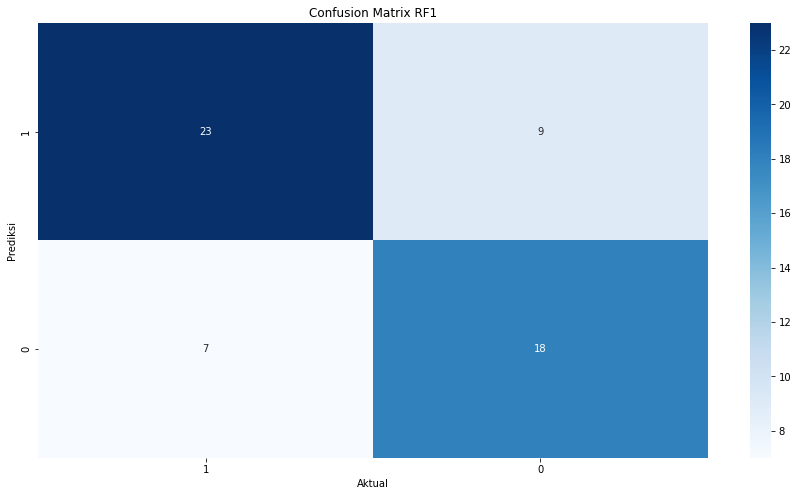

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test1, rf1_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### RF2

Fit model

In [ ]:
rf2_model.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=200)

Hasil prediksi dengan data test

In [ ]:
rf2_prediksi = rf2_model.predict(X_test2)
print("Accuracy : ", metrics.accuracy_score(y_test2, rf2_prediksi))
print("Precision: ", metrics.precision_score(y_test2, rf2_prediksi))
print("Recall   : ", metrics.recall_score(y_test2, rf2_prediksi))
print("F1 Score : ", metrics.f1_score(y_test2, rf2_prediksi))

Accuracy :  0.7192982456140351
Precision:  0.71875
Recall   :  0.7666666666666667
F1 Score :  0.7419354838709677


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

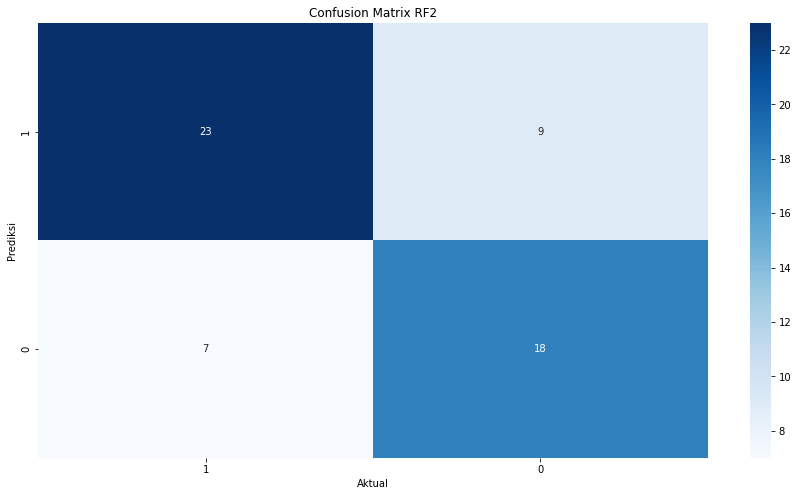

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, rf2_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF2') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### RF3

Fit model

In [ ]:
rf3_model.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=6, n_estimators=50)

Prediksi dengan data test

In [ ]:
rf3_prediksi = rf3_model.predict(X_test3)
print("Accuracy : ", metrics.accuracy_score(y_test3, rf3_prediksi))
print("Precision: ", metrics.precision_score(y_test3, rf3_prediksi))
print("Recall   : ", metrics.recall_score(y_test3, rf3_prediksi))
print("F1 Score : ", metrics.f1_score(y_test3, rf3_prediksi))

Accuracy :  0.7368421052631579
Precision:  0.7272727272727273
Recall   :  0.8
F1 Score :  0.761904761904762


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

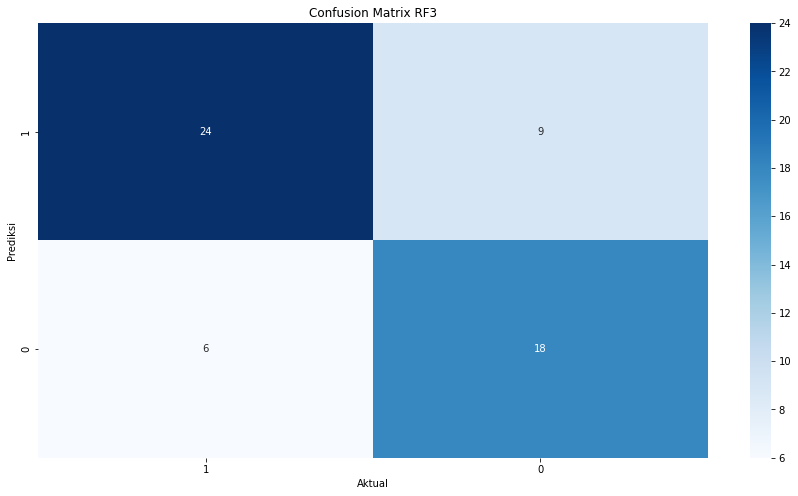

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test3, rf3_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF3') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Export

### Data Test

Label data test dengan hasil prediksi pada masing-masing model

In [ ]:
test_microarray_prediksi = y_test1.to_frame()
test_microarray_prediksi['RF1'] = rf1_prediksi
test_microarray_prediksi['RF2'] = rf2_prediksi
test_microarray_prediksi['RF3'] = rf3_prediksi
test_microarray_prediksi

,Label,RF1,RF2,RF3
0,1.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,0.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,0.0,1.0


Export ke CSV

In [ ]:
test_microarray_prediksi.to_csv(r'test_microarray_prediksi_rf.csv', index=False, header=True)

### Suspect

Fit model

In [ ]:
rf1_model.fit(X_train1, y_train1)
rf2_model.fit(X_train2, y_train2)
rf3_model.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=6, n_estimators=50)

Prediksi dengan Suspect

In [ ]:
rf1_prediksi_suspect = rf1_model.predict(df_suspect1)
rf2_prediksi_suspect = rf2_model.predict(df_suspect2)
rf3_prediksi_suspect = rf3_model.predict(df_suspect3)

Melihat hasil prediksi masing-masing model

In [ ]:
calon_dataframe = {'RF1' : rf1_prediksi_suspect,
                   'RF2' : rf2_prediksi_suspect,
                   'RF3' : rf3_prediksi_suspect}
suspect_prediksi = pd.DataFrame(calon_dataframe)
suspect_prediksi

,RF1,RF2,RF3
0,0.0,1.0,1.0
1,1.0,1.0,1.0
2,0.0,1.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,0.0


Export ke CSV

In [ ]:
suspect_prediksi.to_csv(r'suspect_prediksi_rf.csv', index=False, header=True)